# 5. Feature Engineering
Select important features and construct more meaningful ones using the raw data that we have.

In feature engineering, we try to generate additional features (variables) that have a better explanatory power or a higher predictive power with respect to our target variable.

In our case, we first want to adjust our target variable.

## Import Libraries

In [1]:
# Basic import(s)
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split

# Helper script(s)
from scripts.functions import get_line_equation, remove_outliers

# Hide all warnings in ipython
import warnings
warnings.filterwarnings('ignore')

## Import Removed Outliers Datasets

In [2]:
# Loading of the known.csv dataset via pandas.
known_dataset = pd.read_csv('data/removed_outliers_with_IQR_known.csv')

In [3]:
# Loading of the unknown.csv dataset via pandas.
unknown_dataset = pd.read_csv('data/removed_outliers_with_IQR_unknown.csv')

In [4]:
# Show head for known_dataset.
# We want to make sure that the known.csv dataset has been read in correctly.
known_dataset.head()

,longitude,latitude,f1,f2,f3,f4,f5,f6,t1,id
0,14.25,52.17,11.0,2403.0,890.0,344.0,3.0000,497.0,120800.0,1
1,14.11,52.20,15.0,5644.0,2659.0,783.0,6.7559,757.0,312000.0,2
2,14.26,52.10,52.0,2084.0,1438.0,516.0,2.3087,550.0,258600.0,3
3,11.47,53.09,32.0,3011.0,1287.0,525.0,5.0605,529.0,311000.0,4
4,11.46,53.03,33.0,2824.0,1797.0,493.0,3.6359,523.0,135100.0,5


In [5]:
# Show head for unknown_dataset.
# We want to make sure that the unknown.csv dataset has been read in correctly.
unknown_dataset.head()

,longitude,latitude,f1,f2,f3,f4,f5,f6,t1,id
0,13.28,52.63,34.0,3850.0,1619.0,602.000000,5.0465,608.000000,0.0,1
1,13.31,52.45,21.0,5041.0,2719.0,441.277473,3.5335,470.986642,0.0,2
2,13.39,52.40,52.0,1509.0,674.0,244.000000,4.9306,225.000000,0.0,3
3,13.46,52.59,42.0,1291.0,1535.0,332.000000,1.9083,345.000000,0.0,4
4,13.22,52.51,27.0,4742.0,1682.0,696.000000,6.1940,775.000000,0.0,5


## Preparation

In [6]:
# Import readed .csv datasets into DataFrames.
known_dataset=pd.DataFrame(known_dataset)
unknown_dataset=pd.DataFrame(unknown_dataset)

In [7]:
# Check whether the adjustments produce the desired result for known.csv dataset.
known_dataset.head()

,longitude,latitude,f1,f2,f3,f4,f5,f6,t1,id
0,14.25,52.17,11.0,2403.0,890.0,344.0,3.0000,497.0,120800.0,1
1,14.11,52.20,15.0,5644.0,2659.0,783.0,6.7559,757.0,312000.0,2
2,14.26,52.10,52.0,2084.0,1438.0,516.0,2.3087,550.0,258600.0,3
3,11.47,53.09,32.0,3011.0,1287.0,525.0,5.0605,529.0,311000.0,4
4,11.46,53.03,33.0,2824.0,1797.0,493.0,3.6359,523.0,135100.0,5


In [8]:
# Check whether the adjustments produce the desired result for unknown.csv dataset.
unknown_dataset.head()

,longitude,latitude,f1,f2,f3,f4,f5,f6,t1,id
0,13.28,52.63,34.0,3850.0,1619.0,602.000000,5.0465,608.000000,0.0,1
1,13.31,52.45,21.0,5041.0,2719.0,441.277473,3.5335,470.986642,0.0,2
2,13.39,52.40,52.0,1509.0,674.0,244.000000,4.9306,225.000000,0.0,3
3,13.46,52.59,42.0,1291.0,1535.0,332.000000,1.9083,345.000000,0.0,4
4,13.22,52.51,27.0,4742.0,1682.0,696.000000,6.1940,775.000000,0.0,5


### Feature Interaction

It is often seen in ML experiments when two features combined through an arithmetic operation becomes more significant in explaining variances in the data, than the same two features separately. That's the reason why we analyze some feature variances below.



Given question: "Why should you consider adding extra attributes like f2/f4 (f2 divided by f4) to the training data frame?"

In [9]:
# So we create a new variable that gives us the extra attribute f2/f4 (f2 divided f4) for known.csv dataset.
known_dataset['f2_div_f4'] = (known_dataset.f2/known_dataset.f4).round(2)
print(known_dataset['f2_div_f4'])

0        6.99
1        7.21
2        4.04
3        5.74
4        5.73
         ... 
14995    1.64
14996    4.64
14997    5.91
14998    3.82
14999    3.54
Name: f2_div_f4, Length: 15000, dtype: float64


In [10]:
# So we create a new variable that gives us the extra attribute f2/f4 (f2 divided f4) for unknown.csv dataset.
unknown_dataset['f2_div_f4'] = (unknown_dataset.f2/unknown_dataset.f4).round(2)
print(unknown_dataset['f2_div_f4'])

0       6.40
1      11.42
2       6.18
3       3.89
4       6.81
       ...  
762     5.44
763     4.83
764     5.84
765    20.55
766     5.77
Name: f2_div_f4, Length: 767, dtype: float64


Given question: "Can we consider f6/f2 also as an additional extra attribute?"

In [11]:
# So we create a new variable that gives us the extra attribute for f6/f2 (f6 divided f2) for known.csv dataset.
known_dataset['f6_div_f2'] = (known_dataset.f6/known_dataset.f2).round(2)
print(known_dataset['f6_div_f2'])

0        0.21
1        0.13
2        0.26
3        0.18
4        0.19
         ... 
14995    0.41
14996    0.22
14997    0.21
14998    0.26
14999    0.28
Name: f6_div_f2, Length: 15000, dtype: float64


In [12]:
# So we create a new variable that gives us the extra attribute for f6/f2 (f6 divided f2) for unknown.csv dataset.
unknown_dataset['f6_div_f2'] = (unknown_dataset.f6/unknown_dataset.f2).round(2)
print(unknown_dataset['f6_div_f2'])

0      0.16
1      0.09
2      0.15
3      0.27
4      0.16
       ... 
762    0.19
763    0.23
764    0.20
765    0.20
766    0.18
Name: f6_div_f2, Length: 767, dtype: float64


Given question: "How would you categorize the feature f5, in exactly 5 categories and add it to the data frame as f5_cat extra feature."

In [13]:
# To answer the question of how feature f5 can be categorised into exactly 5 features, let's first look again at the distributions with the function describe().
# We see that max is almost perfectly equal to 8.0409000., so we divide everything into 5 logical ticks: 1.6, 3,2, 4.8, 6.4 and 8.0409000.
known_dataset.f5.describe()

count    15000.000000
mean         3.665553
std          1.471621
min          0.499900
25%          2.566700
50%          3.537750
75%          4.556800
max          8.040900
Name: f5, dtype: float64

In [14]:

# So we create 5 subcategories (5 logical ticks: 1.6, 3.2, 4.8, 6.4 and 8.0409000) from the feature f5 (max value 8.0409000) for known.csv dataset.
f5_known_dataset = known_dataset['f5']

cond_list = [f5_known_dataset <= 1.6, f5_known_dataset <= 3.2, f5_known_dataset <= 4.8, f5_known_dataset <= 6.4, f5_known_dataset <= 8.0409000]
choice_list = [1, 2, 3, 4, 5] # New subcategories from 1-5.

known_dataset['f5_cat'] = np.select(cond_list, choice_list)

In [15]:
# Check if the new category f5_cat is created successfully for known dataset.
known_dataset.head(10)

,longitude,latitude,f1,f2,f3,f4,f5,f6,t1,id,f2_div_f4,f6_div_f2,f5_cat
0,14.25,52.17,11.0,2403.0,890.0,344.0,3.0000,497.0,120800.0,1,6.99,0.21,2
1,14.11,52.20,15.0,5644.0,2659.0,783.0,6.7559,757.0,312000.0,2,7.21,0.13,5
2,14.26,52.10,52.0,2084.0,1438.0,516.0,2.3087,550.0,258600.0,3,4.04,0.26,2
3,11.47,53.09,32.0,3011.0,1287.0,525.0,5.0605,529.0,311000.0,4,5.74,0.18,4
4,11.46,53.03,33.0,2824.0,1797.0,493.0,3.6359,523.0,135100.0,5,5.73,0.19,3
5,13.87,53.32,26.0,4115.0,2184.0,825.0,3.9536,883.0,191000.0,6,4.99,0.21,3
6,13.86,53.31,48.0,1252.0,673.0,308.0,2.3357,305.0,175000.0,7,4.06,0.24,2
7,13.41,52.36,32.0,1615.0,1307.0,345.0,1.4583,382.0,58600.0,8,4.68,0.24,1
8,13.47,52.16,27.0,2287.0,1101.0,466.0,4.6750,491.0,316900.0,9,4.91,0.21,3
9,13.46,52.30,25.0,3807.0,1678.0,600.0,6.6818,600.0,411300.0,10,6.34,0.16,5


In [16]:
known_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   longitude  15000 non-null  float64
 1   latitude   15000 non-null  float64
 2   f1         15000 non-null  float64
 3   f2         15000 non-null  float64
 4   f3         15000 non-null  float64
 5   f4         15000 non-null  float64
 6   f5         15000 non-null  float64
 7   f6         15000 non-null  float64
 8   t1         15000 non-null  float64
 9   id         15000 non-null  int64  
 10  f2_div_f4  15000 non-null  float64
 11  f6_div_f2  15000 non-null  float64
 12  f5_cat     15000 non-null  int32  
dtypes: float64(11), int32(1), int64(1)
memory usage: 1.4 MB


In [17]:
known_dataset['f5_cat']

0        2
1        5
2        2
3        4
4        3
        ..
14995    1
14996    4
14997    2
14998    3
14999    2
Name: f5_cat, Length: 15000, dtype: int32

In [18]:
# So we create 5 subcategories (5 logical ticks: 1.6, 3.2, 4.8, 6.4 and 8.0409000) from the feature f5 (max value 8.0409000) for unknown.csv dataset.
f5_unknown_dataset = unknown_dataset['f5']

cond_list = [f5_unknown_dataset <= 1.6, f5_unknown_dataset <= 3.2, f5_unknown_dataset <= 4.8, f5_unknown_dataset <= 6.4, f5_unknown_dataset <= 8.0409000]
choice_list = [1, 2, 3, 4, 5] # New subcategories from 1-5.

unknown_dataset["f5_cat"] = np.select(cond_list, choice_list)

In [19]:
# Check if the new category f5_cat is created successfully for known dataset.
unknown_dataset.head(10)

,longitude,latitude,f1,f2,f3,f4,f5,f6,t1,id,f2_div_f4,f6_div_f2,f5_cat
0,13.28,52.63,34.0,3850.0,1619.0,602.000000,5.0465,608.000000,0.0,1,6.40,0.16,4
1,13.31,52.45,21.0,5041.0,2719.0,441.277473,3.5335,470.986642,0.0,2,11.42,0.09,3
2,13.39,52.40,52.0,1509.0,674.0,244.000000,4.9306,225.000000,0.0,3,6.18,0.15,4
3,13.46,52.59,42.0,1291.0,1535.0,332.000000,1.9083,345.000000,0.0,4,3.89,0.27,2
4,13.22,52.51,27.0,4742.0,1682.0,696.000000,6.1940,775.000000,0.0,5,6.81,0.16,4
5,13.47,52.52,30.0,249.0,167.0,45.000000,4.5000,44.000000,0.0,6,5.53,0.18,3
6,13.66,52.41,14.0,362.0,88.0,39.000000,3.5893,78.000000,0.0,7,9.28,0.22,3
7,13.43,52.50,52.0,2773.0,1721.0,949.000000,1.1859,998.000000,0.0,8,2.92,0.36,1
8,13.52,52.49,27.0,4336.0,2009.0,734.000000,6.3923,754.000000,0.0,9,5.91,0.17,4
9,13.39,52.53,23.0,1771.0,1105.0,338.000000,3.7049,356.000000,0.0,10,5.24,0.20,3


In [20]:
unknown_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   longitude  767 non-null    float64
 1   latitude   767 non-null    float64
 2   f1         767 non-null    float64
 3   f2         767 non-null    float64
 4   f3         767 non-null    float64
 5   f4         767 non-null    float64
 6   f5         767 non-null    float64
 7   f6         767 non-null    float64
 8   t1         767 non-null    float64
 9   id         767 non-null    int64  
 10  f2_div_f4  767 non-null    float64
 11  f6_div_f2  767 non-null    float64
 12  f5_cat     767 non-null    int32  
dtypes: float64(11), int32(1), int64(1)
memory usage: 75.0 KB


### Small EDA

Small EDA to answer the following questions for feature engineering.
1. Given question: "Why should you consider adding extra attributes like f2/f4 (f2 divided by f4) to the training data frame?"
2. Given question: "Can we consider f6/f2 also as an additional extra attribute?"
3. Given question: "How would you categorize the feature f5, in exactly 5 categories and add it to the data frame as f5_cat extra feature."


In [21]:
known_dataset.describe()

,longitude,latitude,f1,f2,f3,f4,f5,f6,t1,id,f2_div_f4,f6_div_f2,f5_cat
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.00,15000.00,15000.000000
mean,13.481172,52.510121,28.653600,2221.410274,1225.283732,430.147883,3.665553,457.506880,191930.965289,7500.500000,inf,inf,2.795733
std,0.718117,0.542082,12.621942,1113.467961,626.213410,215.511266,1.471621,226.949733,93868.584344,4330.271354,NaN,NaN,0.948016
min,11.460000,50.970000,0.000000,0.000000,0.000000,0.000000,0.499900,0.000000,14999.000000,1.000000,0.00,0.00,1.000000
25%,13.010000,52.110000,18.000000,1446.000000,783.750000,279.000000,2.566700,296.000000,119900.000000,3750.750000,4.45,0.18,2.000000
50%,13.600000,52.520000,29.000000,2125.000000,1164.000000,409.000000,3.537750,437.000000,180450.000000,7500.500000,5.16,0.21,3.000000
75%,14.030000,52.980000,37.000000,2815.000000,1559.000000,545.000000,4.556800,576.000000,242525.000000,11250.250000,5.98,0.24,3.000000
max,14.760000,54.270000,52.000000,5699.000000,3141.000000,1096.000000,8.040900,1161.000000,484600.000000,15000.000000,inf,inf,5.000000


In [22]:
unknown_dataset.describe()

,longitude,latitude,f1,f2,f3,f4,f5,f6,t1,id,f2_div_f4,f6_div_f2,f5_cat
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.0,767.000000,767.000000,767.000000,767.000000
mean,13.403214,52.503596,28.624511,2301.928473,1255.226337,441.277473,3.605463,470.986642,0.0,384.000000,5.473807,0.213455,2.756193
std,0.159312,0.072552,12.347231,1146.611171,614.088150,217.700617,1.425370,230.019469,0.0,221.558119,2.197642,0.064366,0.920756
min,13.050000,52.280000,2.000000,15.000000,11.000000,2.000000,0.499900,3.000000,0.0,1.000000,2.010000,0.090000,1.000000
25%,13.270000,52.440000,18.500000,1542.000000,830.500000,297.500000,2.596850,311.000000,0.0,192.500000,4.475000,0.180000,2.000000
50%,13.403214,52.500000,29.000000,2187.000000,1190.000000,410.000000,3.530200,439.000000,0.0,384.000000,5.220000,0.200000,3.000000
75%,13.530000,52.560000,37.000000,2914.000000,1587.000000,557.000000,4.476000,599.000000,0.0,575.500000,5.970000,0.240000,3.000000
max,13.860000,52.750000,52.000000,5648.000000,3060.000000,1088.000000,7.860100,1141.000000,0.0,767.000000,36.060000,0.730000,5.000000


In [23]:
# Handle -inf values in f2_div_f4_cat and f6_div_f2_cat columns.
# Instead of dropping rows which contain any nulls and infinite numbers, 
# it is more succinct to the reverse the logic of that
# and instead return the rows where all cells are finite numbers.
# The numpy isfinite function does this and the '.all(1)' will only
# return a TRUE if all cells in row are finite.
known_dataset = known_dataset[np.isfinite(known_dataset).all(1)]

In [24]:
known_dataset.describe()

,longitude,latitude,f1,f2,f3,f4,f5,f6,t1,id,f2_div_f4,f6_div_f2,f5_cat
count,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000
mean,13.481169,52.510193,28.652684,2221.919353,1225.260886,430.222291,3.665738,457.536092,191942.866245,7502.957653,5.409220,0.216053,2.795799
std,0.718201,0.542104,12.622110,1113.181959,626.141310,215.471506,1.471773,226.961742,93874.416361,4328.900482,2.415001,0.075168,0.948125
min,11.460000,50.970000,0.000000,8.000000,0.000000,1.000000,0.499900,0.000000,14999.000000,1.000000,0.890000,0.000000,1.000000
25%,13.010000,52.110000,18.000000,1447.000000,783.500000,279.000000,2.566750,296.000000,119900.000000,3754.500000,4.450000,0.180000,2.000000
50%,13.600000,52.520000,29.000000,2125.000000,1164.000000,409.000000,3.538000,437.000000,180500.000000,7503.000000,5.160000,0.210000,3.000000
75%,14.030000,52.980000,37.000000,2815.500000,1558.500000,545.000000,4.557450,576.000000,242550.000000,11251.500000,5.980000,0.240000,3.000000
max,14.760000,54.270000,52.000000,5699.000000,3141.000000,1096.000000,8.040900,1161.000000,484600.000000,15000.000000,132.530000,3.490000,5.000000


In [25]:
unknown_dataset.describe()

,longitude,latitude,f1,f2,f3,f4,f5,f6,t1,id,f2_div_f4,f6_div_f2,f5_cat
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.0,767.000000,767.000000,767.000000,767.000000
mean,13.403214,52.503596,28.624511,2301.928473,1255.226337,441.277473,3.605463,470.986642,0.0,384.000000,5.473807,0.213455,2.756193
std,0.159312,0.072552,12.347231,1146.611171,614.088150,217.700617,1.425370,230.019469,0.0,221.558119,2.197642,0.064366,0.920756
min,13.050000,52.280000,2.000000,15.000000,11.000000,2.000000,0.499900,3.000000,0.0,1.000000,2.010000,0.090000,1.000000
25%,13.270000,52.440000,18.500000,1542.000000,830.500000,297.500000,2.596850,311.000000,0.0,192.500000,4.475000,0.180000,2.000000
50%,13.403214,52.500000,29.000000,2187.000000,1190.000000,410.000000,3.530200,439.000000,0.0,384.000000,5.220000,0.200000,3.000000
75%,13.530000,52.560000,37.000000,2914.000000,1587.000000,557.000000,4.476000,599.000000,0.0,575.500000,5.970000,0.240000,3.000000
max,13.860000,52.750000,52.000000,5648.000000,3060.000000,1088.000000,7.860100,1141.000000,0.0,767.000000,36.060000,0.730000,5.000000


#### Pie Chart

In [26]:
fig = px.pie(known_dataset, values='t1', names='f5_cat')
fig.show()

#### Pie Chart distribution for known.csv
<table>
<thead>
<tr>
<th align="center">New (sub-)categories</th>
<th align="center">t1 datasamples</th>
<th align="center">percentage (%) of known dataset</th>
</tr>
</thead>
<tbody>
<tr>
<td align="left">f5_cat=1</td>
<td align="left">80,173,516.76</td>
<td align="left">2.79</td>
</tr>
<tr>
<td align="left">f5_cat=2</td>
<td align="left">790,230,675.7</td>
<td align="left">27.5</td>
</tr>
<tr>
<td align="left">f5_cat=3</td>
<td align="left">1,147,098,489</td>
<td align="left">39.9</td>
</tr>
<tr>
<td align="left">f5_cat=4</td>
<td align="left">607,232,532.6</td>
<td align="left">21.1</td>
</tr>
<tr>
<td align="left">f5_cat=5</td>
<td align="left">253,448,066.1</td>
<td align="left">8.81</td>
</tr>
</tbody></table>

#### Histograms

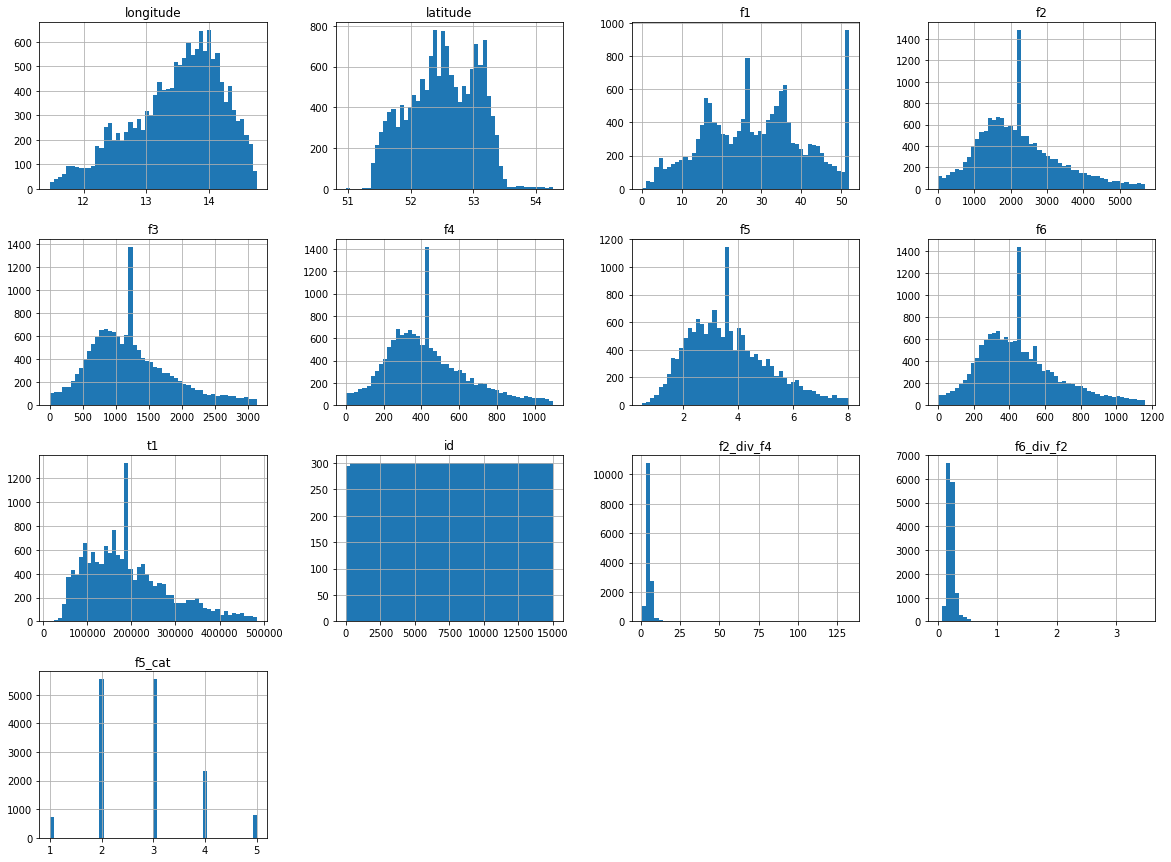

In [27]:
# Plotting of Histograms of known.csv dataset with new columns f2_div_f4, f6_div_f2 and f5_cat to compare with old columns.
known_dataset.hist(bins=50, figsize = (20,15)) 
plt.show()
%matplotlib inline

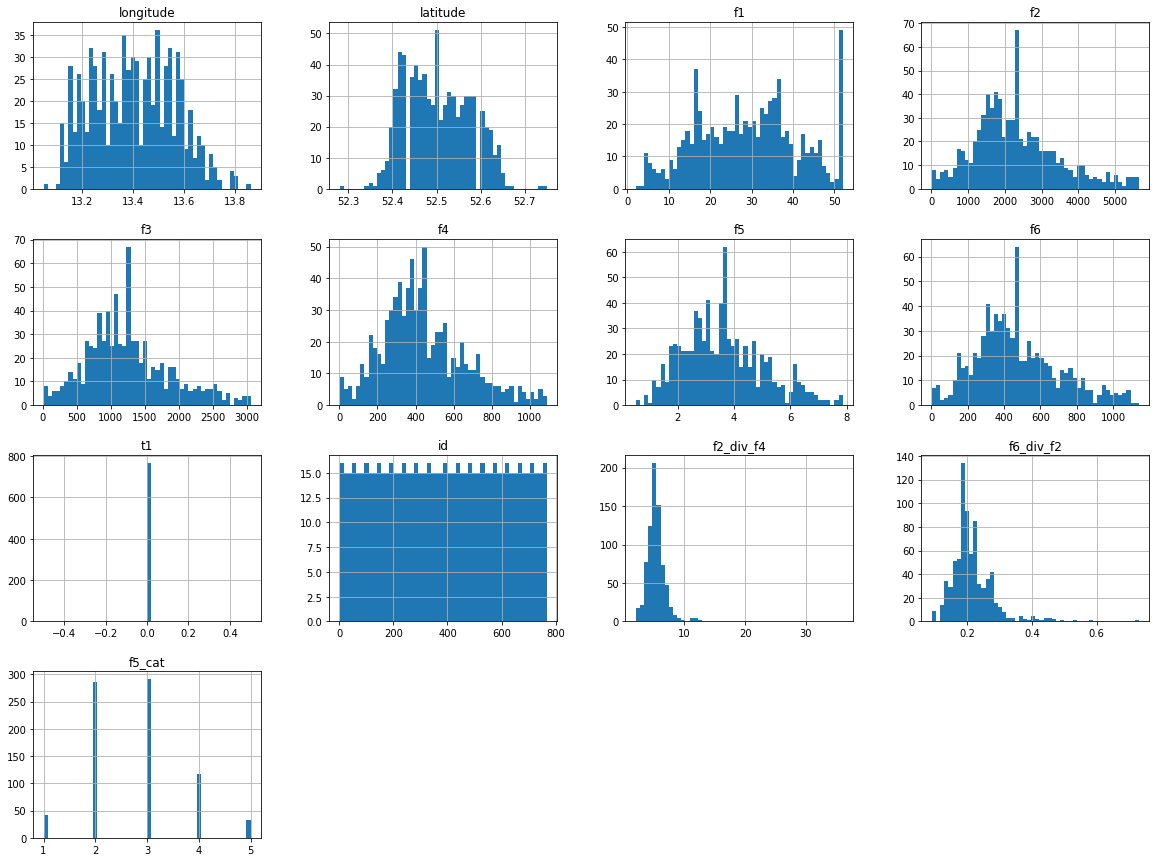

In [28]:
# Plotting of Histograms of unknown.csv dataset with new columns f2_div_f4, f6_div_f2 and f5_cat to compare with old columns.
unknown_dataset.hist(bins=50, figsize = (20,15)) 
plt.show()
%matplotlib inline

##### Detect And Remove Outliers - IQR Approach

In [29]:
# Analyse only those features.
columns_numeric =  ['f2_div_f4', 'f6_div_f2']

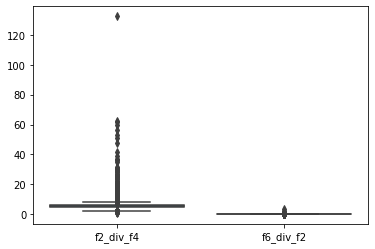

In [30]:
ax = sns.boxplot(data=known_dataset[columns_numeric])

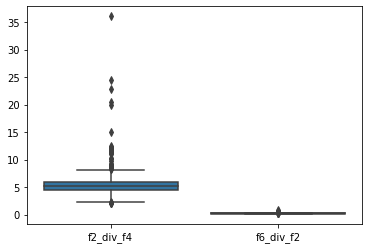

In [31]:
ax = sns.boxplot(data=unknown_dataset[columns_numeric])

In [32]:
# Removing the outliers:
remove_outliers(known_dataset, columns_numeric)
remove_outliers(unknown_dataset, columns_numeric)

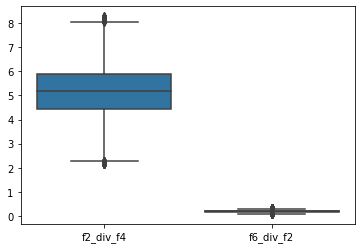

In [33]:
# Check again for outliers in known dataset:
ax = sns.boxplot(data=known_dataset[columns_numeric])

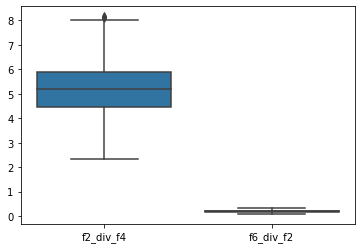

In [34]:
# Check again for outliers in unknown dataset:
ax = sns.boxplot(data=unknown_dataset[columns_numeric])

In [35]:
# Having replaced the outliers for known dataset with NaN, let us now check the sum of null values or missing values using the below code:
known_dataset.isnull().sum()

longitude      0
latitude       0
f1             0
f2             0
f3             0
f4             0
f5             0
f6             0
t1             0
id             0
f2_div_f4    627
f6_div_f2    825
f5_cat         0
dtype: int64

In [36]:
# Having replaced the outliers for unknown dataset with NaN, let us now check the sum of null values or missing values using the below code:
unknown_dataset.isnull().sum()

longitude     0
latitude      0
f1            0
f2            0
f3            0
f4            0
f5            0
f6            0
t1            0
id            0
f2_div_f4    36
f6_div_f2    34
f5_cat        0
dtype: int64

Now, we can use any of the below techniques to treat the NULL values:

In [37]:
# So we decide again to impute missing values with Mean/Median, because columns in the dataset which are having numeric continous values can be replaced with the mean, median, or mode of remaining values in the column. This method can prevent the loss of data. Replacing two approximations (mean, median) is a statistical approach to handle the missing values.
known_dataset['f2_div_f4'] = known_dataset['f2_div_f4'].replace(np.NaN, known_dataset['f2_div_f4'].mean())
known_dataset['f6_div_f2'] = known_dataset['f6_div_f2'].replace(np.NaN, known_dataset['f6_div_f2'].mean())

unknown_dataset['f2_div_f4'] = unknown_dataset['f2_div_f4'].replace(np.NaN, unknown_dataset['f2_div_f4'].mean())
unknown_dataset['f6_div_f2'] = unknown_dataset['f6_div_f2'].replace(np.NaN, unknown_dataset['f6_div_f2'].mean())

In [38]:
# Now all is fine again for known dataset. No Null or NaN values exists.
known_dataset.isnull().sum()

longitude    0
latitude     0
f1           0
f2           0
f3           0
f4           0
f5           0
f6           0
t1           0
id           0
f2_div_f4    0
f6_div_f2    0
f5_cat       0
dtype: int64

In [39]:
# Now all is fine again for known dataset. No Null or NaN values exists.
unknown_dataset.isnull().sum()

longitude    0
latitude     0
f1           0
f2           0
f3           0
f4           0
f5           0
f6           0
t1           0
id           0
f2_div_f4    0
f6_div_f2    0
f5_cat       0
dtype: int64

#### Heatmap

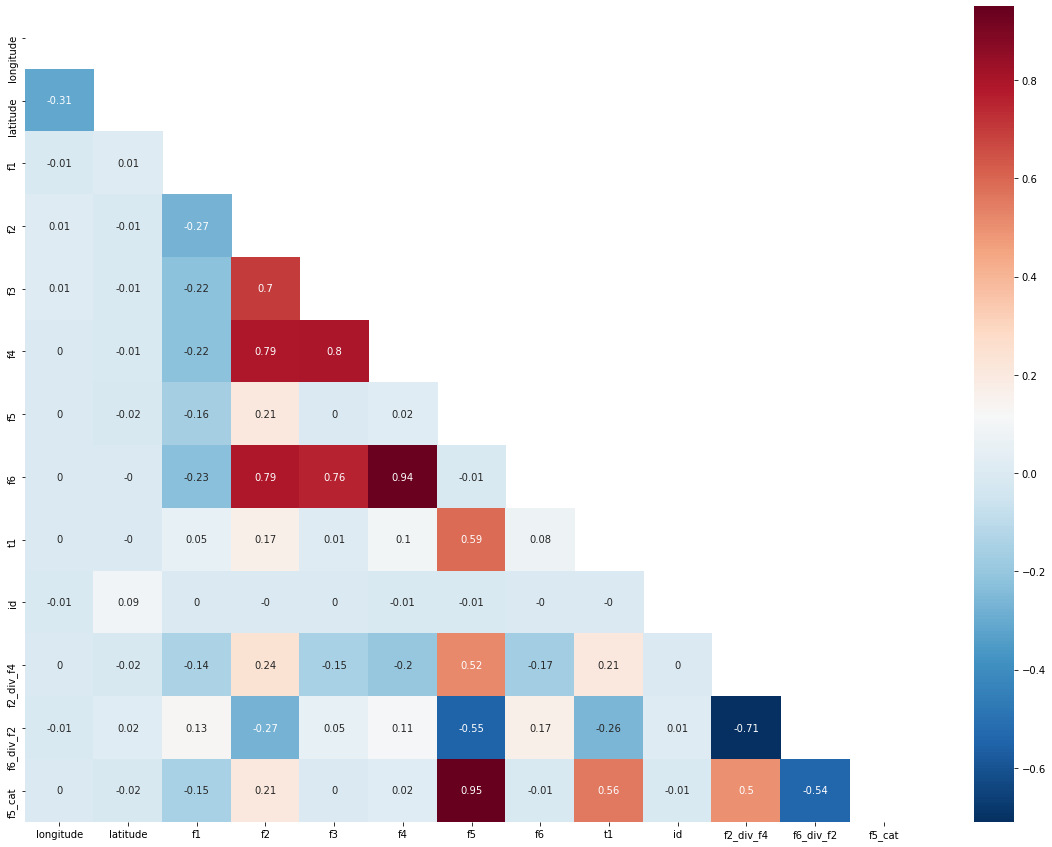

In [40]:
# Heatmap of the Pearson correlation coefficients of known.csv dataset.
mask = np.triu(known_dataset.corr())
plt.figure(figsize = (20,15))
ax = sns.heatmap(round(known_dataset.corr(), 2)
                 ,annot=True
                 ,mask=mask
                 ,cmap='RdBu_r')

We can see some important relationships on the heatmap after we created the new features `f2_div_f4`, `f6_div_f2` and `f5_cat`:
- f2_div_f4 & f6_div_f2 `very weak` relationship (score = `-0.71`),
- f2_div_f4 & f5 `moderate` relationship (score = `0.5`),
- f6_div_f2 & f5 `weak` relationship (score = `-0.54`),

- f5_cat & f5 `extreme strong` relationship (score = `0.95`).
- f5_cat & t1 `moderate` relationship (score = `0.56`),
- f5_cat & f2_div_f4 `moderate` relationship (score = `0.32`),
- f5_cat & f6_div_f2 `weak` relationship (score = `-0.54`).

#### Intercept And Slope

In [41]:
# Calculate the intercept and slope of a line between two points for known dataset.
known_dataset1 = [known_dataset.f1[1],known_dataset.t1[1]]
known_dataset2 = [known_dataset.f1[2],known_dataset.t1[2]]
slope, intercept = get_line_equation(p1=known_dataset1, p2=known_dataset2) 
print('intercept: ', intercept)
print('slope: ', slope)

intercept:  333648.64864864864
slope:  -1443.2432432432433


Text(0.5, 1.0, 'Line fitted on two points versus on all of the points')

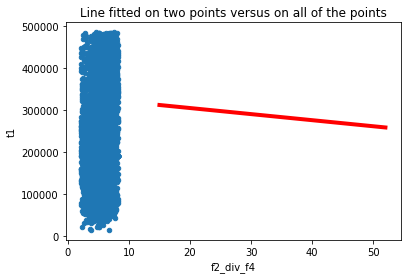

In [42]:
# Plot line fitted on two points versus on all of the points of f2_div_f4 from known dataset.
fig = known_dataset.plot(x='f2_div_f4', 
                y='t1', 
                kind='scatter')
# Plot the linear regression line.
plt.plot(np.unique(known_dataset.f2_div_f4), np.poly1d(np.polyfit(known_dataset.f2_div_f4, known_dataset.t1, 1))(np.unique(known_dataset.f2_div_f4)))
# Plot the line between two points.
plt.plot([known_dataset1[0], known_dataset2[0]], [known_dataset1[1], known_dataset2[1]], color="red", linewidth=4)
plt.title("Line fitted on two points versus on all of the points")

Text(0.5, 1.0, 'Line fitted on two points versus on all of the points')

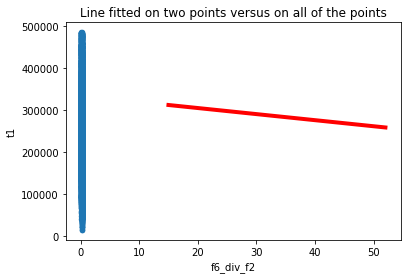

In [43]:
# Plot line fitted on two points versus on all of the points of f6_div_f2 from known dataset.
fig = known_dataset.plot(x='f6_div_f2', 
                y='t1',
                kind='scatter')
# Plot the linear regression line.
plt.plot(np.unique(known_dataset.f6_div_f2), np.poly1d(np.polyfit(known_dataset.f6_div_f2, known_dataset.t1, 1))(np.unique(known_dataset.f6_div_f2)))
# Plot the line between two points.
plt.plot([known_dataset1[0], known_dataset2[0]], [known_dataset1[1], known_dataset2[1]], color="red", linewidth=4)
plt.title("Line fitted on two points versus on all of the points")

Text(0.5, 1.0, 'Line fitted on two points versus on all of the points')

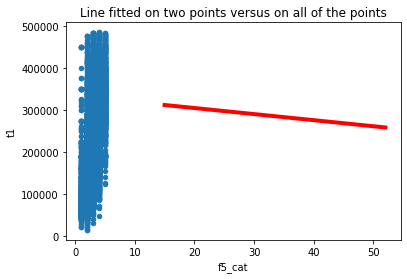

In [44]:
# Plot line fitted on two points versus on all of the points of f5_cat from known dataset.
fig = known_dataset.plot(x='f5_cat', 
                y='t1', 
                kind='scatter')
# Plot the linear regression line.
plt.plot(np.unique(known_dataset.f5_cat), np.poly1d(np.polyfit(known_dataset.f5_cat, known_dataset.t1, 1))(np.unique(known_dataset.f5_cat)))
# Plot the line between two points.
plt.plot([known_dataset1[0], known_dataset2[0]], [known_dataset1[1], known_dataset2[1]], color="red", linewidth=4)
plt.title("Line fitted on two points versus on all of the points")

## Feature Selection

We are using Regression Feature Selection because we have numerical input and numerical output (label).

Feature selection is performed using Pearson's Correlation Coefficient via the `f_regression()` function.

In [45]:
# The target variable t1 and the id are not necessary for our training dataset.
drop_lst = ['t1','id']

In [46]:
# We would like to consider all variables except the ones mentioned above.
all_features = [x for x in known_dataset.columns if x not in drop_lst]

In [47]:
# Check selected features for ML.
print(all_features)

['longitude', 'latitude', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f2_div_f4', 'f6_div_f2', 'f5_cat']


In [48]:
# X contains all descriptive variables defined above.
X = known_dataset[all_features]

In [49]:
# We define y (our dependent variable).
y = known_dataset.t1

In [50]:
# Split into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
# Summarize.
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (10496, 11) (10496,)
Test (4499, 11) (4499,)


We define the SelectKBest class to use the `f_regression()` function and select, then transform the train and test sets.

In [51]:
# Configure to select all features.
fs = SelectKBest(score_func=f_regression, k='all')
# Learn relationship from training data.
fs.fit(X_train, y_train)
# Transform train input data.
X_train_fs = fs.transform(X_train)
# Transform test input data.
X_test_fs = fs.transform(X_test)
X_train_fs, X_test_fs, fs


(array([[14.43, 52.1 , 29.  , ...,  6.33,  0.18,  3.  ],
        [13.11, 52.57, 14.  , ...,  5.71,  0.18,  2.  ],
        [14.35, 52.47, 34.  , ...,  5.34,  0.19,  3.  ],
        ...,
        [13.42, 52.7 , 20.  , ...,  5.4 ,  0.18,  2.  ],
        [13.6 , 53.4 , 26.  , ...,  6.43,  0.18,  3.  ],
        [12.92, 52.27, 24.  , ...,  7.57,  0.18,  3.  ]]),
 array([[12.23, 52.72, 20.  , ...,  6.1 ,  0.18,  2.  ],
        [13.25, 51.61, 45.  , ...,  4.92,  0.26,  3.  ],
        [14.55, 52.05, 17.  , ...,  4.58,  0.28,  2.  ],
        ...,
        [13.64, 53.4 , 36.  , ...,  4.89,  0.2 ,  3.  ],
        [13.95, 53.57, 33.  , ...,  8.12,  0.13,  3.  ],
        [13.62, 53.13, 49.  , ...,  4.78,  0.21,  3.  ]]),
 SelectKBest(k='all', score_func=<function f_regression at 0x000002D728582D30>))

We can then print the scores for each variable (largest is better) and plot the scores for each variables as bar graph to get an idea of how many features we should select.

Feature 0: 1.064363
Feature 1: 0.000581
Feature 2: 32.220550
Feature 3: 328.629710
Feature 4: 1.240831
Feature 5: 111.432896
Feature 6: 5320.158971
Feature 7: 74.851346
Feature 8: 470.667044
Feature 9: 746.894718
Feature 10: 4687.550466


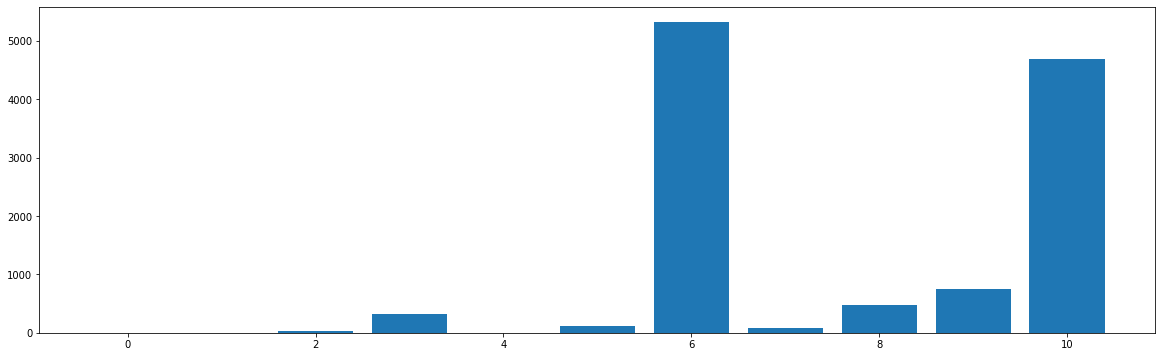

In [52]:
# What are scores for the features.
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# Plot the scores.
plt.figure(figsize=(20, 6))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [53]:
# Check again selected features for ML to compare with feature scores above.
print(all_features)

['longitude', 'latitude', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f2_div_f4', 'f6_div_f2', 'f5_cat']


We have obtained the score values for each variable in our training dataset and are now evaluating the results:

- Feature 0: `not necessary` longitude (score = `1.064363`),
- Feature 1: `not necessary` latitude (score = `0.000581`),
- Feature 2: `not necessary` f1 (score = `32.220550`),
- Feature 3: `important` f2 (score = `328.629710`),
- Feature 4: `not necessary` f3 (score = `1.240831`),
- Feature 5: `important` f4 (score = `111.432896`),
- Feature 6: `very important` f5 (score = `5320.158971`),
- Feature 7: `not necessary` f6 (score = `74.851346`),
- Feature 8: `important` f2_div_f4 (score = `470.667044`),
- Feature 9: `important` f6_div_f2 (score = `746.894718`),
- Feature 10: `very important` f5_cat (score = `4687.550466`).

We decide to use only those features for training that have a score of more than 100 points:

- Feature 3: `important` f2 (score = `328.629710`),
- Feature 5: `important` f4 (score = `111.432896`),
- Feature 6: `very important` f5 (score = `5320.158971`),
- Feature 8: `important` f2_div_f4 (score = `470.667044`),
- Feature 9: `important` f6_div_f2 (score = `746.894718`),
- Feature 10: `very important` f5_cat (score = `4687.550466`).

In predictive modeling, we can therefore include the results of feature selection if we wish. However, this is not binding.

## Export Created Features For Model Training

In [54]:
# Save featured known dataset with new features to a new .csv file
path = 'data/featured_known.csv'
known_dataset.to_csv(path,
index=False) # Avoid creating an index in a saved .csv file.

In [55]:
# Save featured unknown dataset with new features to a new .csv file
path = 'data/featured_unknown.csv'
unknown_dataset.to_csv(path,
index=False) # Avoid creating an index in a saved .csv file.